**A percepção dos usuários de redes sociais sobre a tecnologia de NFT e suas aplicações analisadas sob a ótica da análise de sentimentos com processamento de linguagem natural**

PARTE 2: Processamento e transformação dos dados coletados (tokenização, lemantização, limpeza de stop words e caracteres especiais, e remoção de spam)

# Importações e referências

In [ ]:
# Biblioteca de processamento de linguagem natural
import nltk
# Pandas para manipulação de dados e análises estatísticas
import pandas as pd
# Nunpy para manipulação numérica
import numpy as np
#  O punktmódulo é um modelo pré-treinado que ajuda a tokenizar palavras e frases. 
from nltk.tokenize import wordpunct_tokenize
#-------------------------------------------------
# wordnet é um banco de dados lexical para o idioma inglês que ajuda o script a determinar a palavra base.
nltk.download('wordnet')
# averaged_perceptron_taggerrecurso para determinar o contexto de uma palavra em uma frase.
nltk.download('averaged_perceptron_tagger')
# para o tageamento das palavras como verbo, substantivo ou adjetivo
from nltk.tag import pos_tag
# para fazer a lemantização das palavras agrupando palavras de um mesmo significado em um unico verbo
from nltk.stem.wordnet import WordNetLemmatizer
# bibliotecas para manipulação de texto
import re, string
# lista com as palavras que devem ser desconsideradas no texto (Stopwords)
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
#-----------------------------------
# Para a contagem da Frequência de palavras
from nltk import FreqDist
# Para embaralhar os datasets de modelos supervisionados
import random
#--------------------------------------
# Para a criação do modelo Naive Bayes
from nltk import classify
from nltk import NaiveBayesClassifier
#------------------------------------
# Para a criação do wordcloud e gráficos
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#------------------------------------------
# Para a exportação dos dados em excel
!pip install xlsxwriter

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Código de referência NLTK


https://cliente.widhost.com.br/knowledgebase/151/Como-executar-a-analise-de-sentimentos-em-Python-3-usando-o-Natural-Language-Toolkit-NLTK.html


Documentação NLTK


https://www.nltk.org

Documentação NLTK tokenização


https://www.nltk.org/api/nltk.tokenize.html


In [ ]:
# Dataset principal com os 60 mil tweets coletados na etapa anterior
df = pd.read_excel('/content/tweet_nft_raw.xlsx', sheet_name = 'nft')

# Dataset para a classificação de spam
df1 = pd.read_excel('/content/treino_spam_nft.xlsx', sheet_name = 'nft')

In [ ]:
df.head(2)

,data,texto_original
0,2022-02-09 23:59:59,@kezynfts @sadboyz_nft what an interesting pro...
1,2022-02-09 23:59:59,look how cute this nft is 😍 check em out https...


In [ ]:
df1.head(2)

,indice,avaliacao,Spam,texto_original
0,0,1,1,@kezynfts @sadboyz_nft what an interesting pro...
1,1,1,1,look how cute this nft is 😍 check em out https...


### Limpeza inicial: Removendo @, # e links

In [ ]:
# Data frame principal (df)
listaa= []
for i in df.texto_original:
  for c in i.split():
    if c[0] =="@" or c[0] =="#" or c[0:4]=="http":
      i = i.replace(c,"")
  listaa.append(i.strip())
df['texto'] = listaa
df.tail()

,data,texto_original,texto
59995,2022-03-10 23:45:34,"@fuujinaxs yea, you look so pogi🥰","yea, you look so pogi🥰"
59996,2022-03-10 23:45:33,@nft_machine_ @the_ape_society @kalb0e @fugazi...,best of luck!🤞💕
59997,2022-03-10 23:45:32,@ape3593 @realdonaldnfts @boredapeyc @animocab...,i don’t have a problem with kycing myself. but...
59998,2022-03-10 23:45:32,just saw someone say they turned down an offer...,just saw someone say they turned down an offer...
59999,2022-03-10 23:45:31,would you be interested in nfts if i launched ...,would you be interested in nfts if i launched ...


In [ ]:
# Data frame de treino da filtragem de spam (df1) 
listaa2= []
for i in df1.texto_original:
  for c in i.split():
    if c[0] =="@" or c[0] =="#" or c[0:4]=="http":
      i = i.replace(c,"")
  listaa2.append(i.strip())
df1['texto'] = listaa2
df1.tail()

,indice,avaliacao,Spam,texto_original,texto
1499,1499,0,0,it is all happening at https://t.co/c3pdtdi34k...,it is all happening at for genesis holders ...
1500,1500,0,0,@yozora_pa @psychedelic_nft matching backgroun...,matching backgrounds 🔥🔥🔥
1501,1501,1,1,@briangarrett @womenofcrypto_ i was just sayin...,i was just saying how you don't see enough fem...
1502,1502,0,1,i am back and bought some dope nft's with my l...,i am back and bought some dope nft's with my l...
1503,1503,1,1,@thesandboxgame @thesnoopavatars @solanium_ozl...,"i like these nft's very much, i think you shou..."


# Parte 1: Tratando o Spam

A remoção dos dados de Spam será realizada com a utilização de um modelo supervisionado de classificação do tipo Naive Bayes, treinado com um dataset com 1500 registros tokenizados e previamente rotulados manualmente como “Spam” ou “Opinião”, divididos em um conjunto de treino com 70% dos registros, e de teste com os demais 30%.

### Tokenizando, Normalizando os dados, aplicando a lemantização, tirando stopwords e caracteres especiais

In [ ]:
# Texto tokenizado de todos os tweets em lista
texto_token = []
for c in range(len(df1)):
  texto_token.append(wordpunct_tokenize(df1.texto[c]))

# Lista de stopwords com 184 palavras e acrescimo de outras palavras
stop_words = stopwords.words('english')
stop_words[len(stop_words):] = ["nft","nfts", "nft's", "!!","..","’","...","!!!","one"]

# Lemantização e limpeza do texto

lemmatizer = WordNetLemmatizer()
lemmantized_text = []
lemmatized_sentence= []

for c in range(len(texto_token)):
  for token, tag in pos_tag(texto_token[c]):
    token = re.sub(r'[0-9]+', '', token)
    if tag.startswith("NN"):
        pos = 'n'
    elif tag.startswith('VB'):
        pos = 'v'
    else:
        pos = 'a'
    if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
      lemmatized_sentence.append(lemmatizer.lemmatize(token, pos))
  lemmantized_text.append(lemmatized_sentence)
  lemmatized_sentence = []

texto_limpo = lemmantized_text
texto_limpo[3]

['new', 'collection', 'washi', 'artist', 'limit']

In [ ]:
# Comparação entre os dados tokenizados e com os dados limpos e lemantizados
print(texto_token[0])
print(lemmantized_text[0])

['what', 'an', 'interesting', 'project']
['interesting', 'project']


In [ ]:
texto_limpo[0]

['interesting', 'project']

In [ ]:
len(texto_limpo)

1504

## Supervisionado (Detecção de Spam)

In [ ]:
# Dividindo o dataset em Opinião e Spam
df1['token'] = texto_limpo
p_modelo = df1.copy()
opinion = p_modelo[p_modelo['Spam'] == 1]
spam = p_modelo[p_modelo['Spam'] == 0]


# Convertendo tokens em um dicionário
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

opinion_tokens_for_model = get_tweets_for_model(opinion.token)
spam_tokens_for_model = get_tweets_for_model(spam.token)


# Divisão do conjunto de dados para treinamento e teste do modelo
opinion_dataset = [(tweet_dict, "opinion") for tweet_dict in opinion_tokens_for_model]
spam_dataset = [(tweet_dict, "spam") for tweet_dict in spam_tokens_for_model]

dataset = opinion_dataset + spam_dataset

random.shuffle(dataset)

train_data = dataset[:1000]
test_data = dataset[1000:]

In [ ]:
# Visualizando o dataset
p_modelo.head(2)

,indice,avaliacao,Spam,texto_original,texto,token
0,0,1,1,@kezynfts @sadboyz_nft what an interesting pro...,what an interesting project,"[interesting, project]"
1,1,1,1,look how cute this nft is 😍 check em out https...,look how cute this nft is 😍 check em out,"[look, cute, 😍, check, em]"


In [ ]:
print(f'{len(spam_dataset)} são dados rotulados como Spam e {len(opinion_dataset)} foram rotulados como opinião')

792 são dados rotulados como Spam e 712 foram rotulados como opinião


In [ ]:
# Quantidade de dados de treino
len(train_data)

1000

In [ ]:
# Quantidade de dados de teste
len(test_data)

504

In [ ]:
# Visualizando o dataset com as opiniões
opinion_dataset[0:1]

[({'interesting': True, 'project': True}, 'opinion')]

### Criando, testando e aplicando o modelo

In [ ]:
# Criando o modelo inserindo os dados de treino 
classifier = NaiveBayesClassifier.train(train_data)
print("Acurácia do Modelo:", classify.accuracy(classifier, test_data))
print(classifier.show_most_informative_features(10))

Acurácia do Modelo: 0.7182539682539683
Most Informative Features
                     via = True             spam : opinio =     18.0 : 1.0
             collectible = True             spam : opinio =     11.7 : 1.0
                    link = True             spam : opinio =     10.0 : 1.0
                      wl = True             spam : opinio =      7.2 : 1.0
                 opensea = True             spam : opinio =      7.0 : 1.0
                       🚀 = True             spam : opinio =      6.0 : 1.0
               available = True             spam : opinio =      6.0 : 1.0
                   think = True           opinio : spam   =      5.5 : 1.0
                 polygon = True             spam : opinio =      5.4 : 1.0
                     feb = True             spam : opinio =      5.4 : 1.0
None


# Parte 2: Aplicando o modelo no dataset

### Tokenizando, normalizando os dados, aplicando a lemantização, tirando stopwords e caracteres especiais

In [ ]:
# Texto tokenizado de todos os tweets em lista
texto_token = []
for c in range(len(df)):
  texto_token.append(wordpunct_tokenize(df.texto[c]))

# Lista de stopwords com 184 palavras e acrescimo de outras palavras
stop_words = stopwords.words('english')
stop_words[len(stop_words):] = ["nft","nfts", "nft's", "!!","..","’","!!!","...","one"]

# Lemantização e limpeza do texto

lemmatizer = WordNetLemmatizer()
lemmantized_text = []
lemmatized_sentence= []

for c in range(len(texto_token)):
  for token, tag in pos_tag(texto_token[c]):
    token = re.sub(r'[0-9]+', '', token)
    if tag.startswith("NN"):
        pos = 'n'
    elif tag.startswith('VB'):
        pos = 'v'
    else:
        pos = 'a'
    if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
      lemmatized_sentence.append(lemmatizer.lemmatize(token, pos))
  lemmantized_text.append(lemmatized_sentence)
  lemmatized_sentence = []

texto_limpo = lemmantized_text
texto_limpo[3]

['new', 'collection', 'washi', 'artist', 'limit']

In [ ]:
len(texto_limpo)

60000

In [ ]:
df.head()

,data,texto_original,texto
0,2022-02-09 23:59:59,@kezynfts @sadboyz_nft what an interesting pro...,what an interesting project
1,2022-02-09 23:59:59,look how cute this nft is 😍 check em out https...,look how cute this nft is 😍 check em out
2,2022-02-09 23:59:58,@ai_mai_nft done,done
3,2022-02-09 23:59:58,#nft this is the new collection of the washi a...,this is the new collection of the washi artist...
4,2022-02-09 23:59:58,"@legaleagle @bmc_nft offers massive utility, s...","offers massive utility, super community, aaa+ ..."


### Determinando a densidade da palavra, frequência e Word Cloud

In [ ]:
# Acrescentando a coluna com os extos tokenizados
df['token'] = texto_limpo

In [ ]:
df.head()

,data,texto_original,texto,token
0,2022-02-09 23:59:59,@kezynfts @sadboyz_nft what an interesting pro...,what an interesting project,"[interesting, project]"
1,2022-02-09 23:59:59,look how cute this nft is 😍 check em out https...,look how cute this nft is 😍 check em out,"[look, cute, 😍, check, em]"
2,2022-02-09 23:59:58,@ai_mai_nft done,done,[do]
3,2022-02-09 23:59:58,#nft this is the new collection of the washi a...,this is the new collection of the washi artist...,"[new, collection, washi, artist, limit]"
4,2022-02-09 23:59:58,"@legaleagle @bmc_nft offers massive utility, s...","offers massive utility, super community, aaa+ ...","[offer, massive, utility, super, community, aa..."


In [ ]:
lista_palavras = []
for tokens in df.token:
    for token in tokens:
        lista_palavras.append(token)
        
freq_dist_pos = FreqDist(lista_palavras)

In [ ]:
# Total de palavras do texto
len(lista_palavras)

538880

Descobrindo quais são as palavras mais comuns usando a FreqDistclasse NLTK.

In [ ]:
tabela_frequencia = pd.DataFrame(list(freq_dist_pos.items()), columns = ["Word","Frequency"]).sort_values(by = "Frequency", ascending = False, ignore_index = True)
tabela_frequencia.head(30)

,Word,Frequency
0,project,6887
1,community,6082
2,collection,5044
3,art,4837
4,check,4789
5,get,4780
6,drop,3769
7,new,3417
8,like,3278
9,eth,3071


In [ ]:
# Exportando o dataset com a contagem da freqência das palavras
writer= pd.ExcelWriter('frequencia_raw.xlsx', engine= 'xlsxwriter')
tabela_frequencia.to_excel(writer, sheet_name='freq')
writer.save()

In [ ]:
tabela_frequencia['Frequency'].describe()

count    39191.000000
mean        13.750096
std        114.331090
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       6887.000000
Name: Frequency, dtype: float64

In [ ]:
print(f'''\n90% : {np.percentile(tabela_frequencia['Frequency'], 90)}\n
95% : {np.percentile(tabela_frequencia['Frequency'], 95)}\n
99% : {np.percentile(tabela_frequencia['Frequency'], 99)}\n
99,9% : {np.percentile(tabela_frequencia['Frequency'], 99.9).round()}''')


90% : 12.0

95% : 33.0

99% : 237.0

99,9% : 1525.0


In [ ]:
# As 50 palavras que mais apareceram representam menos de 1% (0.9996%) do total de palavras do corpus (e se repetem mais de 1434 vezes)
np.percentile(tabela_frequencia['Frequency'], (1 - 50/len(tabela_frequencia))*100)

1331.0306192747667

In [ ]:
50/len(tabela_frequencia)

0.0012758031180628206

<function matplotlib.pyplot.show>

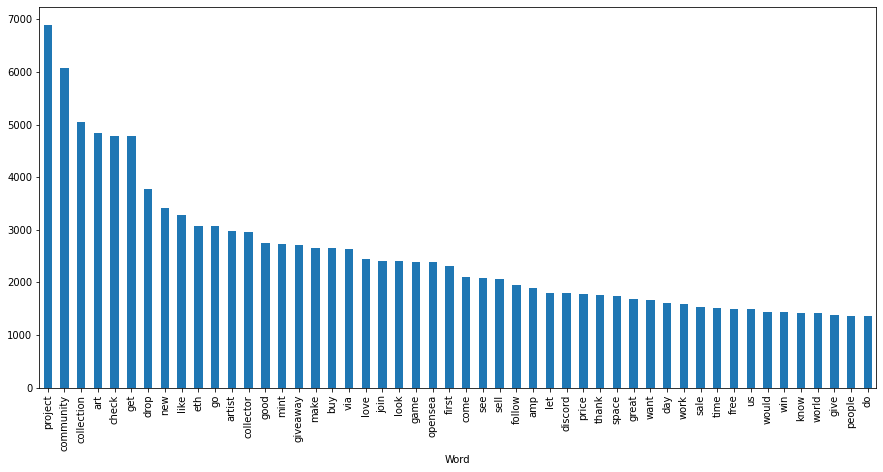

In [ ]:
# A distribuição da ocorrência das 50 palavras mais repetidas nos tweets
graf = tabela_frequencia[tabela_frequencia['Frequency']>np.percentile(tabela_frequencia['Frequency'], (1 - 50/len(tabela_frequencia))*100)]
graf.plot(kind='bar', x='Word', y='Frequency', figsize=(15,7), legend=False)
plt.show

<function matplotlib.pyplot.show>

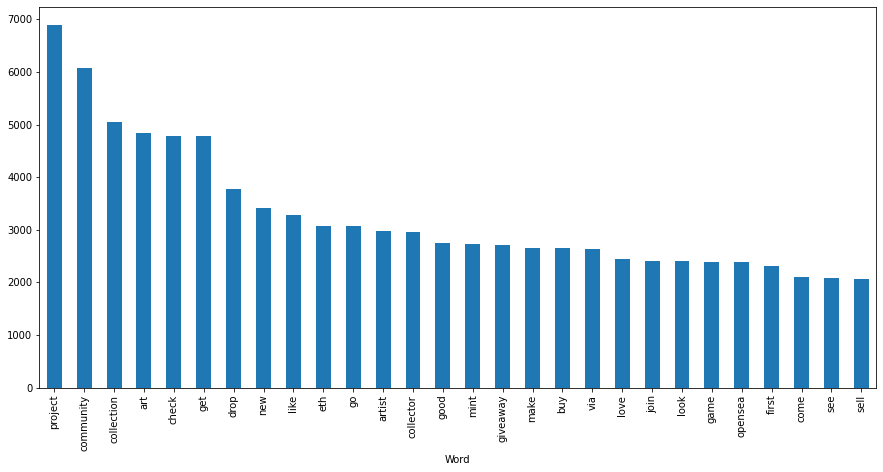

In [ ]:
# A distribuição da ocorrência das 31 palavras repetidas mais de 2000 vezes
graf = tabela_frequencia[tabela_frequencia['Frequency']> 2000]
graf.plot(kind='bar', x='Word', y='Frequency', figsize=(15,7), legend=False)
plt.show

Wordcloud antes da filtragem de Spam

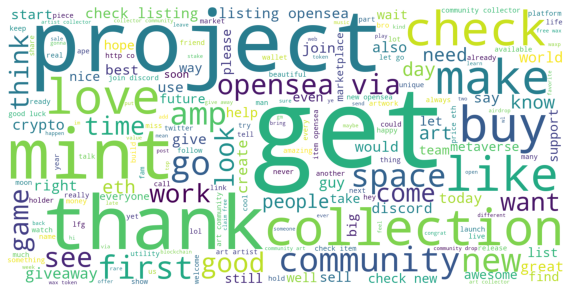

In [ ]:
# Criando uma string com todas as palavras tokenizadas 
texto_completo = " ".join(s for s in lista_palavras).lower()

# Gerando a núvem de palavras
wordcloud = WordCloud(stopwords = stop_words, background_color = "white", width = 1600, height= 800).generate(texto_completo)

# Mostrando imagem
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("nft_comspam_wordcloud.png")

### Classificando Spam

In [ ]:
p1_modelo = df.copy()
p1_modelo['token'] = texto_limpo

lista_spam = []
for c in p1_modelo.token:
  lista_spam.append(classifier.classify(dict([i, True] for i in c)))

p1_modelo['modelo'] = lista_spam

In [ ]:
p1_modelo.tail()

,data,texto_original,texto,token,modelo
59995,2022-03-10 23:45:34,"@fuujinaxs yea, you look so pogi🥰","yea, you look so pogi🥰","[yea, look, pogi, 🥰]",spam
59996,2022-03-10 23:45:33,@nft_machine_ @the_ape_society @kalb0e @fugazi...,best of luck!🤞💕,"[best, luck, !🤞💕]",opinion
59997,2022-03-10 23:45:32,@ape3593 @realdonaldnfts @boredapeyc @animocab...,i don’t have a problem with kycing myself. but...,"[problem, kycing, hold, high, standard, e, dis...",opinion
59998,2022-03-10 23:45:32,just saw someone say they turned down an offer...,just saw someone say they turned down an offer...,"[saw, someone, say, turn, offering, half, mil,...",opinion
59999,2022-03-10 23:45:31,would you be interested in nfts if i launched ...,would you be interested in nfts if i launched ...,"[would, interest, launch, project, ?!, 🧐, thin...",opinion


In [ ]:
# Quantidade de textos classificados como opinião
len(p1_modelo[p1_modelo['modelo'] == 'opinion'])

24885

In [ ]:
# Quantidade de textos classificados como spam
len(p1_modelo[p1_modelo['modelo'] == 'spam'])

35115

In [ ]:
# Exportando o dataset com a classificação de spam
writer= pd.ExcelWriter('opiniao_modelo.xlsx', engine= 'xlsxwriter')
p1_modelo.to_excel(writer, sheet_name='spam')
writer.save()

## Exploração, frequência e Word Cloud

In [ ]:
df = p1_modelo[p1_modelo['modelo'] == 'opinion']

In [ ]:
len(df)

24885

In [ ]:
lista_palavras = []
for tokens in df.token:
    for token in tokens:
        lista_palavras.append(token)

freq_dist_pos = FreqDist(lista_palavras)
tabela_frequencia = pd.DataFrame(list(freq_dist_pos.items()), columns = ["Word","Frequency"]).sort_values(by = "Frequency", ascending = False, ignore_index = True)
tabela_frequencia.head(30)

,Word,Frequency
0,project,3820
1,good,2114
2,get,2107
3,love,1810
4,like,1808
5,go,1694
6,make,1531
7,community,1456
8,look,1431
9,see,1348


In [ ]:
# Total de palavras do texto
len(lista_palavras)

215275

In [ ]:
# Exportando o dataset com a frequência de palavras entre os textos filtrados
writer= pd.ExcelWriter('frequencia_opiniao.xlsx', engine= 'xlsxwriter')
tabela_frequencia.to_excel(writer, sheet_name='freq')
writer.save()

In [ ]:
tabela_frequencia['Frequency'].describe()

count    20832.000000
mean        10.333861
std         63.743980
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       3820.000000
Name: Frequency, dtype: float64

In [ ]:
print(f'''\n90% : {np.percentile(tabela_frequencia['Frequency'], 90)}\n
95% : {np.percentile(tabela_frequencia['Frequency'], 95)}\n
99% : {np.percentile(tabela_frequencia['Frequency'], 99)}\n
99,9% : {np.percentile(tabela_frequencia['Frequency'], 99.9).round()}''')


90% : 12.0

95% : 32.0

99% : 179.0

99,9% : 872.0


In [ ]:
# As 50 palavras que mais apareceram representam menos de 0,5% do total de palavras do corpus (e se repetem mais de 530 vezes)
np.percentile(tabela_frequencia['Frequency'], (1 - 50/len(tabela_frequencia))*100)

541.0024001536112

In [ ]:
1-(1 - 50/len(tabela_frequencia))

0.002400153609831035

<function matplotlib.pyplot.show>

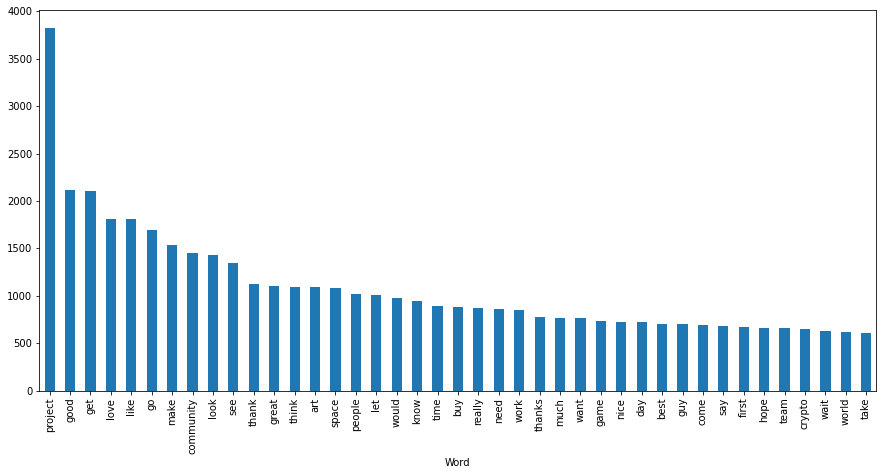

In [ ]:
# A distribuição da ocorrência das 50 palavras mais repetidas nos tweets

graf = tabela_frequencia[tabela_frequencia['Frequency']>600]
graf.plot(kind='bar', x='Word', y='Frequency', figsize=(15,7), legend=False)
plt.show


In [ ]:
tabela_frequencia[tabela_frequencia['Frequency']>600].describe()

,Frequency
count,41.000000
mean,1089.707317
std,601.492778
min,607.000000
25%,701.000000
50%,879.000000
75%,1125.000000
max,3820.000000


Wordcloud dos textos com o spam filtrado

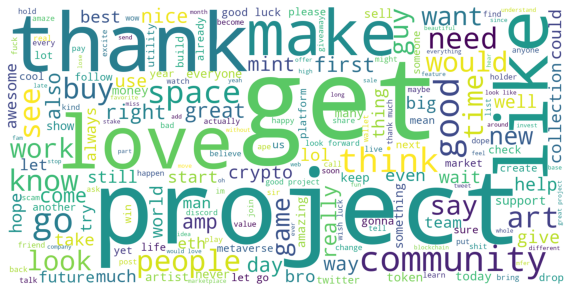

In [ ]:
texto_completo = " ".join(s for s in lista_palavras).lower()

# gerando a núvem de palavras
wordcloud = WordCloud(stopwords = stop_words, background_color = "white", width = 1600, height= 800).generate(texto_completo)

# mostrando imagem
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("nft_limpo_wordcloud.png")